In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy

In [2]:
url='http://bit.ly/drinksbycountry'

In [3]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [4]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [14]:
pd.read_csv(r'C:\Users\Dell\Downloads\beer-servings.csv')

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [16]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [22]:
data=pd.read_csv('beer-servings.csv',index_col='Unnamed: 0')

In [19]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [20]:
data.shape

(193, 7)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [23]:
data.isna().sum()
#data.isnull().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

# fill missing values

In [24]:
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [25]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [27]:
num_cols=data[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol',]]

In [28]:
num_cols.isna().sum()

beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

# Imputation=filling the missing values

# 1.simple imputor

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [31]:
type(num_cols)

numpy.ndarray

In [32]:
num_cols = pd.DataFrame(num_cols,columns=[['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol',]])

In [33]:
type(num_cols)

pandas.core.frame.DataFrame

In [34]:
num_cols.isna().sum()

beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
dtype: int64

In [36]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [39]:
data.drop(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol',],axis=1, inplace=True)

In [40]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


In [41]:
data=pd.concat([num_cols,data],axis=1)

In [42]:
data.head()

,"(beer_servings,)","(spirit_servings,)","(wine_servings,)","(total_litres_of_pure_alcohol,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


In [43]:
data.isna().sum()

(beer_servings,)                   0
(spirit_servings,)                 0
(wine_servings,)                   0
(total_litres_of_pure_alcohol,)    0
country                            0
continent                          0
dtype: int64

# imputing second method

In [45]:
data= pd.read_csv('beer-servings.csv',index_col='Unnamed: 0')

In [46]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

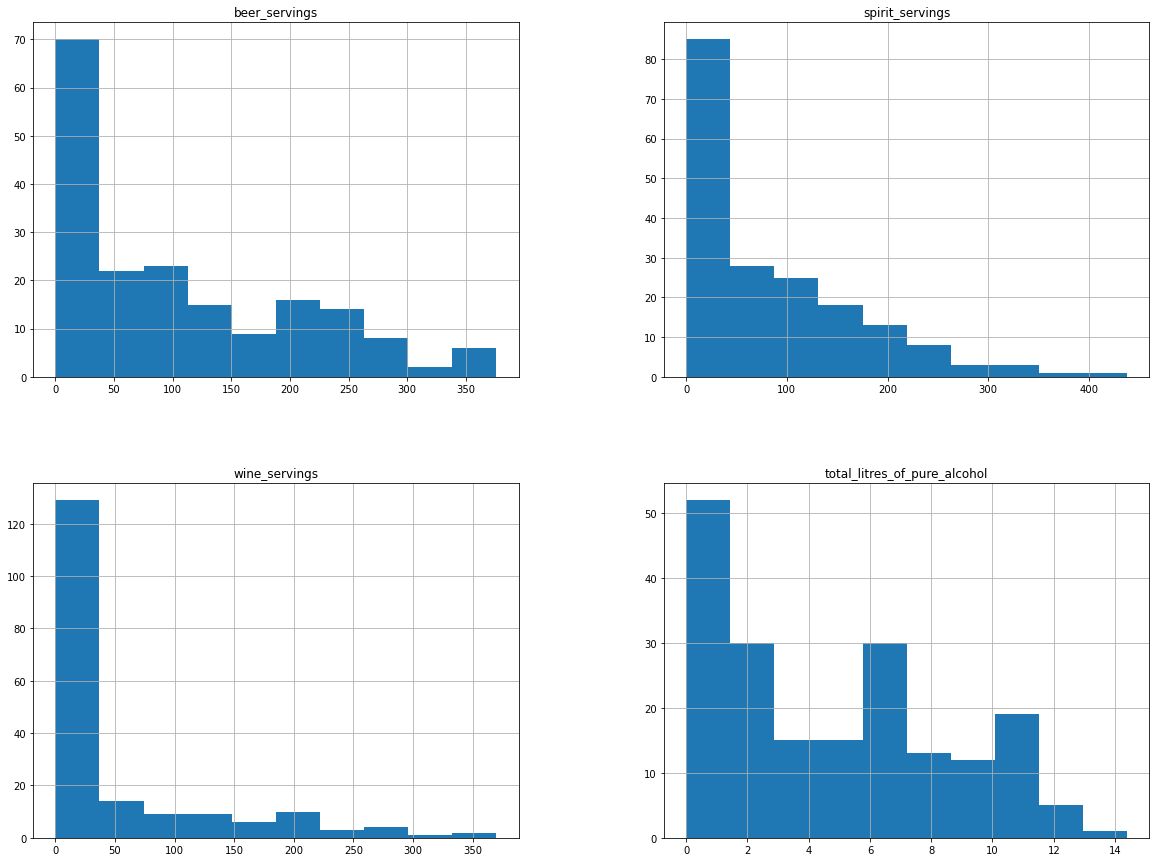

In [47]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [48]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [49]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())

In [50]:
data['beer_servings'].isna().sum()

0

In [51]:
for i in['spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
    data[i] = data[i].fillna(data[i].median())

In [52]:
data.isnull().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

# Managing Outliers

Text(0.5, 1.0, 'Boxplot of Beer Servings column')

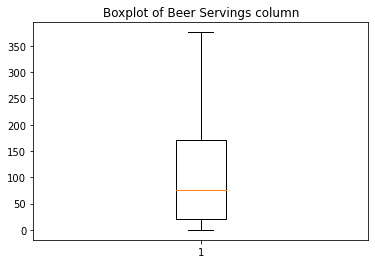

In [54]:
plt.boxplot(data['beer_servings'])
plt.title('Boxplot of Beer Servings column')

Text(0.5, 1.0, 'Boxplot of Spirit Servings column')

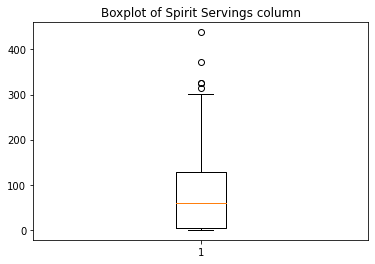

In [56]:
plt.boxplot(data['spirit_servings'])
plt.title('Boxplot of Spirit Servings column')

In [57]:
Q1 =np.percentile(data['spirit_servings'],25,interpolation='midpoint')
Q2 =np.percentile(data['spirit_servings'],50,interpolation='midpoint')
Q3 =np.percentile(data['spirit_servings'],75,interpolation='midpoint')

In [58]:
print(Q1)
print(Q2)
print(Q3)

5.0
60.0
128.0


In [61]:
data['spirit_servings'].median()

60.0

In [62]:
IQR=Q3-Q1

In [63]:
print(IQR)

123.0


In [73]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [74]:
print(low_lim)
print(up_lim)

-179.5
312.5


In [75]:
outlier =[]
for x in data['spirit_servings']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [76]:
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [77]:
ind=data['spirit_servings']>up_lim

In [78]:
data.loc[ind].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [123]:
#data.drop([15, 68, 73, 141, 144],inplace=True)

In [83]:
data.head(20)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.00,Asia
1,Albania,89.0,132.0,54.0,4.90,Europe
2,Algeria,25.0,0.0,14.0,0.70,Africa
3,Andorra,245.0,138.0,312.0,12.40,Europe
4,Angola,217.0,57.0,45.0,5.90,Africa
5,Antigua & Barbuda,102.0,128.0,45.0,4.90,North America
6,Argentina,76.0,25.0,221.0,8.30,South America
7,Armenia,21.0,179.0,11.0,3.80,Europe
8,Australia,261.0,72.0,212.0,10.40,Oceania
9,Austria,279.0,75.0,191.0,9.70,Europe


Text(0.5, 1.0, 'Boxplot of WineServings column')

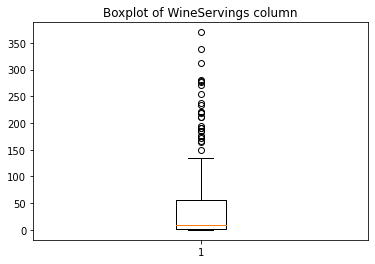

In [85]:
plt.boxplot(data['wine_servings'])
plt.title('Boxplot of WineServings column')

In [135]:
Q1 =np.percentile(data['wine_servings'],25,interpolation='midpoint')
Q2 =np.percentile(data['wine_servings'],50,interpolation='midpoint')
Q3 =np.percentile(data['wine_servings'],75,interpolation='midpoint')

In [136]:
print(Q1)
print(Q2)
print(Q3)

1.0
9.0
57.5


In [137]:
data['wine_servings'].median()

9.0

In [138]:
IQR=Q3-Q1

In [139]:
print(IQR)

56.5


In [140]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [141]:
print(low_lim)
print(up_lim)

-83.75
142.25


In [142]:
outlier =[]
for x in data['wine_servings']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [143]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [132]:
ind=data['wine_servings']>up_lim

In [133]:
data.loc[ind].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

Text(0.5, 1.0, 'Box plot for Total Liters of  Pure Alcohol')

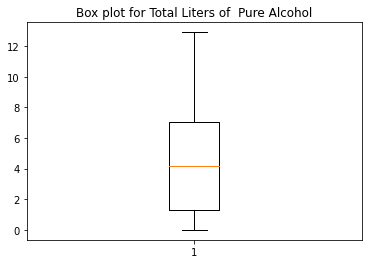

In [144]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Box plot for Total Liters of  Pure Alcohol')

There is no outliers for the "Total Liters of Pure Alcohol"


We can show the same by calculation of Inter Quartile Range (IQR)

In [103]:
Q1 = np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation='midpoint')
Q2 = np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
Q3 = np.percentile(data['total_litres_of_pure_alcohol'],75,interpolation='midpoint')

In [105]:
print(Q1)
print(Q2)
print(Q3)

1.25
4.2
7.05


In [109]:
data['total_litres_of_pure_alcohol'].median()

4.2

In [106]:
IQR =Q3-Q1

In [108]:
print(IQR)

5.8


In [110]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [111]:
print(low_lim)
print(up_lim)

-7.449999999999999
15.75


In [112]:
outlier =[]
for x in data['total_litres_of_pure_alcohol']:
    if(x>up_lim) or (x<low_lim):
        outlier.append(x)

In [113]:
outlier

[]

Shows There is no Outlier for "Total Liters Of  Pure Alcohol"